https://www.python-graph-gallery.com/

https://matplotlib.org/stable/gallery/color/named_colors.html

# VIOLIN PLOT

A violint plot allow to visualize the distribution of a numeric variable for one or several groups. ```Seaborn``` is particularly adapted to build it thanks to its ```violin()``` function. Violinplots deserve more attention compared to boxplots that can sometimes hide features of the data.


In [ ]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")
df = sns.load_dataset('iris')
df.head(1)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa

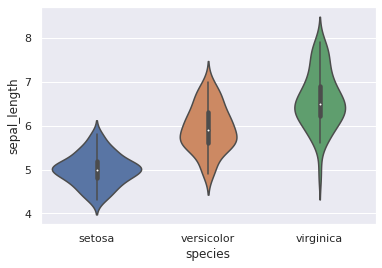

In [ ]:
# Basic plot
sns.violinplot(x=df["species"], y=df["sepal_length"])

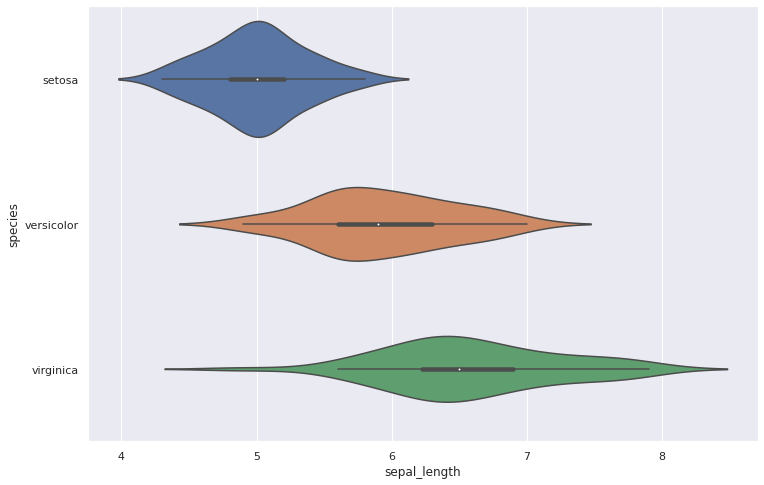

In [ ]:
# Horizontal violin plot: just switch x and y
sns.violinplot(y=df["species"], x=df["sepal_length"])
plt.show()

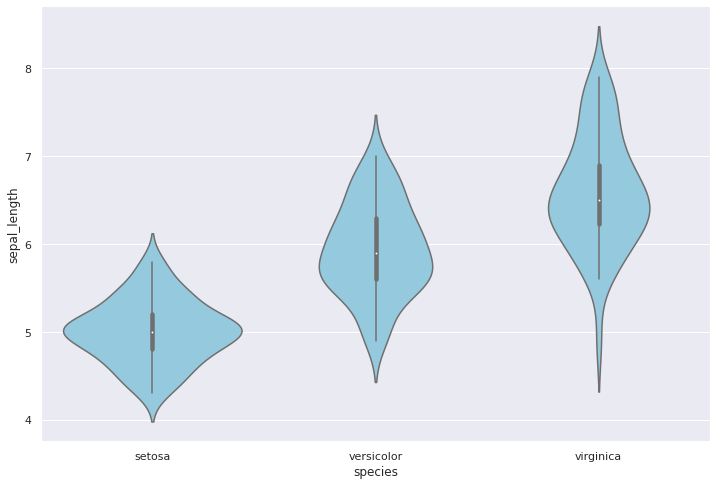

In [ ]:
# Uniform color plot
sns.violinplot(x=df["species"], y=df["sepal_length"], color="skyblue")
plt.show()

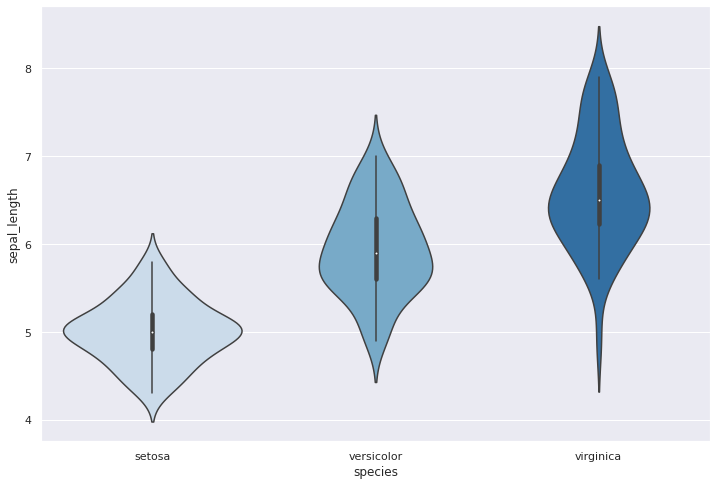

In [ ]:
# Plot with a color palette
sns.violinplot(x=df["species"], y=df["sepal_length"], palette="Blues")
plt.show()

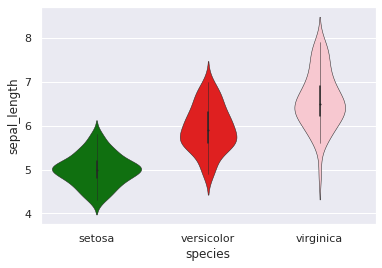

In [ ]:
# Plot with a customized color palette
# creating a dictionary with one specific color per group:
my_pal = {"versicolor": "red", "setosa": "green", "virginica": "pink"}

# plot it
sns.violinplot(x=df["species"], y=df["sepal_length"], palette=my_pal,
               linewidth = 0.5)
plt.show()

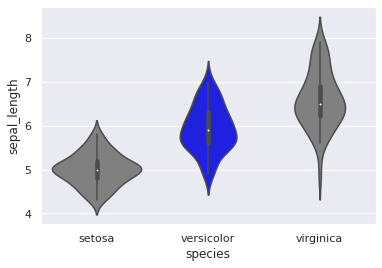

In [ ]:
# Plot with a customized color palette using criteria
# creating a dictionary composed of species as keys and colors as values: red for the interesting group, blue for others
my_pal = {species: "blue" if species == "versicolor" else "gray" for species in df["species"].unique()}

# make the plot
sns.violinplot(x=df["species"], y=df["sepal_length"], palette=my_pal)
plt.show()

# VENN DIAGRAM



In [ ]:
pip install matplotlib_venn

In [ ]:
from matplotlib_venn import venn3

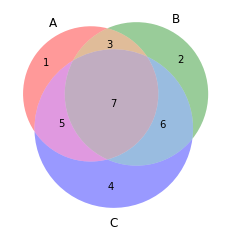

In [ ]:
venn3(subsets = (1, 2, 3, 4, 5, 6, 7), set_labels = ('A', 'B', 'C'))

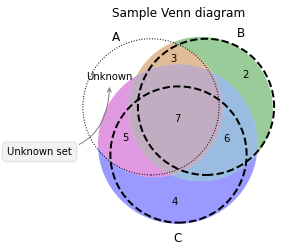

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles
plt.figure(figsize=(4,4))
v = venn3(subsets=(1, 2, 3, 4, 5, 6, 7), set_labels = ('A', 'B', 'C'))
v.get_patch_by_id('100').set_alpha(1.0)
v.get_patch_by_id('100').set_color('white')
v.get_label_by_id('100').set_text('Unknown')
v.get_label_by_id('A').set_text('A')
c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='dashed')
c[0].set_lw(1.0)
c[0].set_ls('dotted')
plt.title("Sample Venn diagram")
plt.annotate('Unknown set', xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
plt.show()

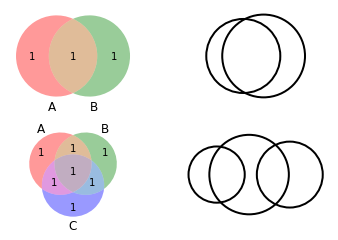

In [ ]:
from matplotlib_venn import venn2, venn2_circles
figure, axes = plt.subplots(2, 2)
venn2(subsets={'10': 1, '01': 1, '11': 1}, set_labels = ('A', 'B'), ax=axes[0][0])
venn2_circles((1, 2, 3), ax=axes[0][1])
venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'), ax=axes[1][0])
venn3_circles({'001': 10, '100': 20, '010': 21, '110': 13, '011': 14}, ax=axes[1][1])
plt.show()

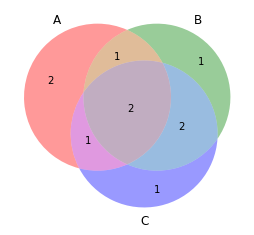

In [ ]:
from matplotlib_venn import venn3
set1 = set(['Avestruz','Paloma', 'Gallina', 'Loro', 'Pato', 'Piquero'])
set2 = set(['Gallina', 'Pato', 'Ganso', 'Paloma', 'Pavo', 'Colibrí'])
set3 = set(['Gallina', 'Loro','Pato','Ganso', 'Pavo', 'Codorniz'])

venn3([set1, set2, set3], ('A', 'B', 'C'))
plt.show()

# DENSITY PLOT

Density plots allow to visualize the distribution of a numeric variable for one or several groups. They are very well adapted for large dataset, as stated in data-to-viz.com. Note that 2 approaches exist to build them in python: the first one consists in computing a kernel density estimate, the second one in building a high resolution histogram.

If you are in a rush, the most straightforward way to build a density chart is to use ```Seaborn``` and its ```kdeplot()``` function. You just need to provide it with a numeric variable from your dataset. 🔥

In [ ]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")
df = sns.load_dataset('iris')

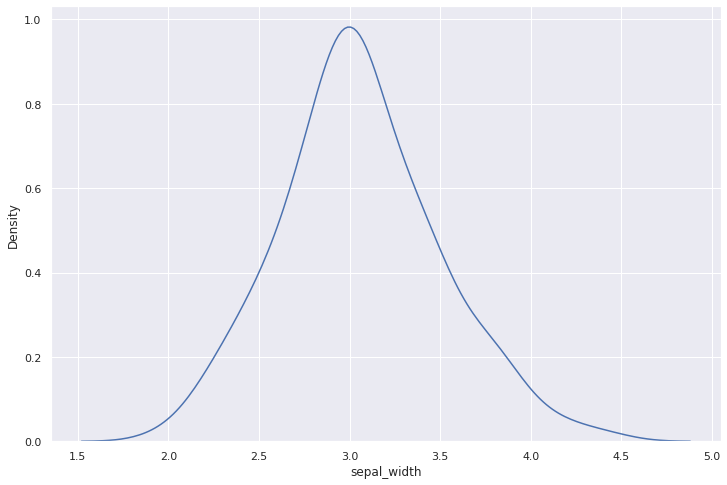

In [ ]:
# Make default density plot
sns.kdeplot(df['sepal_width'])

In [ ]:
import numpy as np
import math
media =np.mean(df['sepal_width'])
desv = np.std(df['sepal_width'])
se = desv/math.sqrt(len(df['sepal_width']))
print("Con una confianza del 95% el ancho del sépalo tiene una medida de ", str(round(media, 3)), "±", str(round(se, 3)))

Con una confianza del 95% el ancho del sépalo tiene una medida de  3.057 ± 0.035


Formating the plot

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


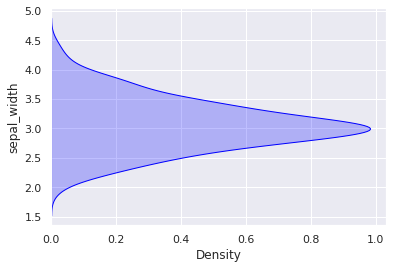

In [ ]:
# setting 'vertical' parameter to True
sns.kdeplot(df['sepal_width'], shade=True, vertical=True, color="blue")
plt.show()

Multiple density plots

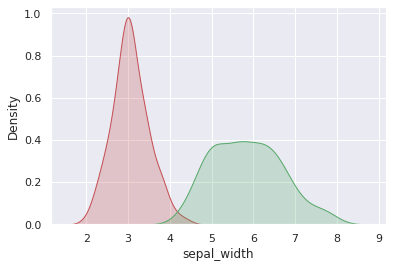

In [ ]:
# plotting both distibutions on the same figure
fig = sns.kdeplot(df['sepal_width'], shade=True, color="r")
fig = sns.kdeplot(df['sepal_length'], shade=True, color="g")
plt.show()

Multiple density plots by categories

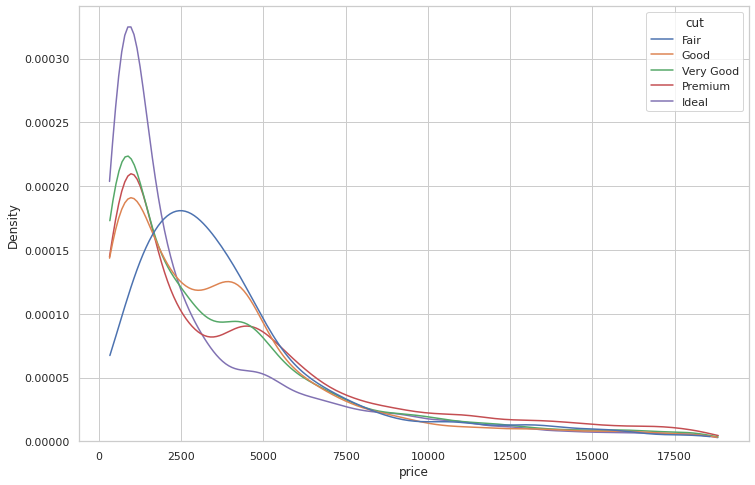

In [ ]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine.data import diamonds # dataset

# Set figure size for the notebook
plt.rcParams["figure.figsize"]=12,8

# set seaborn whitegrid theme
sns.set(style="whitegrid")

# Without transparency
sns.kdeplot(data=diamonds, x="price", hue="cut", cut=0, fill=False, common_norm=False, alpha=1)
plt.show()


In [ ]:
diamonds.head(2)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31

Faceting plots

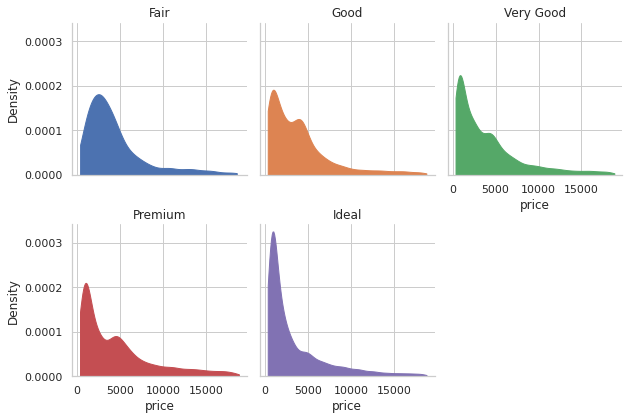

In [ ]:
# using small multiple
# create a grid
g = sns.FacetGrid(diamonds, col='cut', hue='cut', col_wrap=3)

# draw density plots
g = g.map(sns.kdeplot,"price", cut=0, fill=True, common_norm=False, alpha=1, legend=False)

# control the title of each facet
g = g.set_titles("{col_name}")

# show the graph
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.


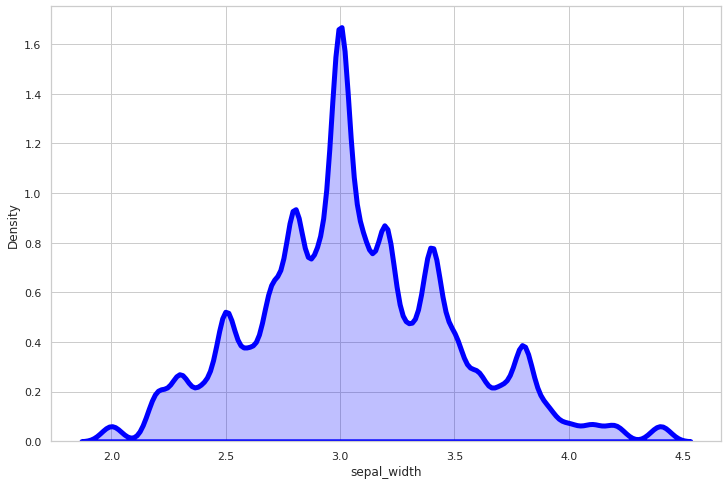

In [ ]:
# Change bandwidth
sns.kdeplot(df['sepal_width'], shade=True, bw=0.1, color='blue', lw =5) # if using seaborn < 0.11.0
plt.show()

# Histogram
With Seaborn, ```histograms``` are made using the histplot function. You can call the function with default values, what already gives a nice chart. Though, do not forget to play with the number of bins using the ‘bins’ argument. Indeed, a pattern can be hidden under the hood that one would not be able to detect with default bins values.

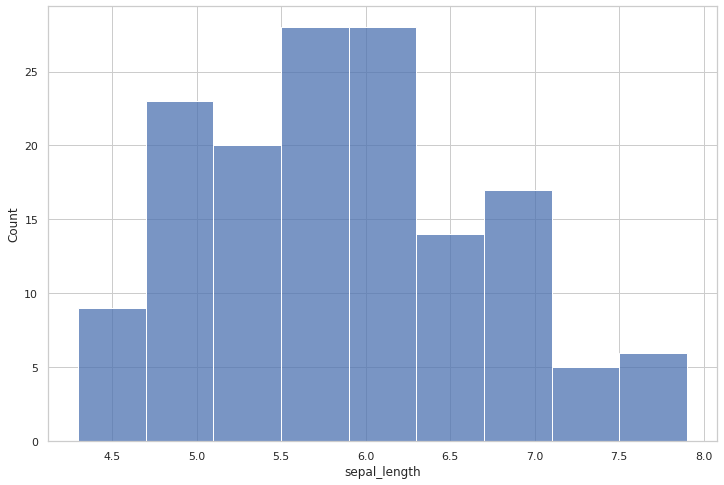

In [ ]:
# Simplest plot
sns.histplot(data=df, x="sepal_length")
plt.show()

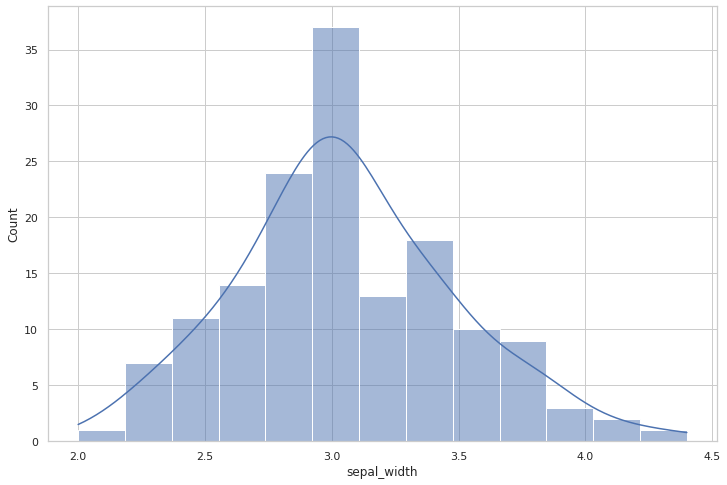

In [ ]:
# Simplest plot with Density plot
sns.histplot(data=df, x="sepal_width", kde=True)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


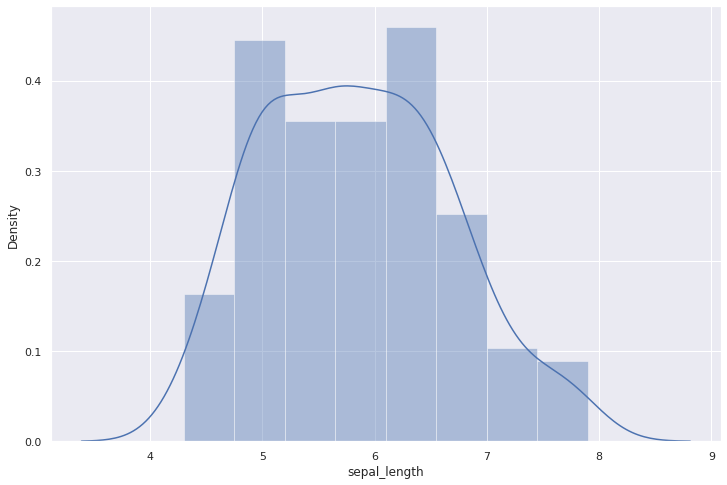

In [ ]:
# ALTERNATIVE FORM: simplest Histogram with Density plot
sns.distplot(df["sepal_length"])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


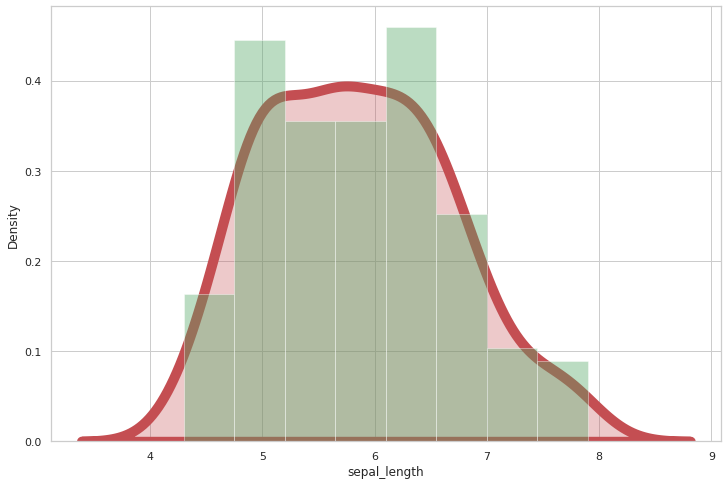

In [ ]:
# Customizing the density curve
sns.distplot(df["sepal_length"], kde=True, color = 'g',
             kde_kws={"color": "r", "alpha": 0.3, "linewidth": 10, "shade": True})
plt.show()

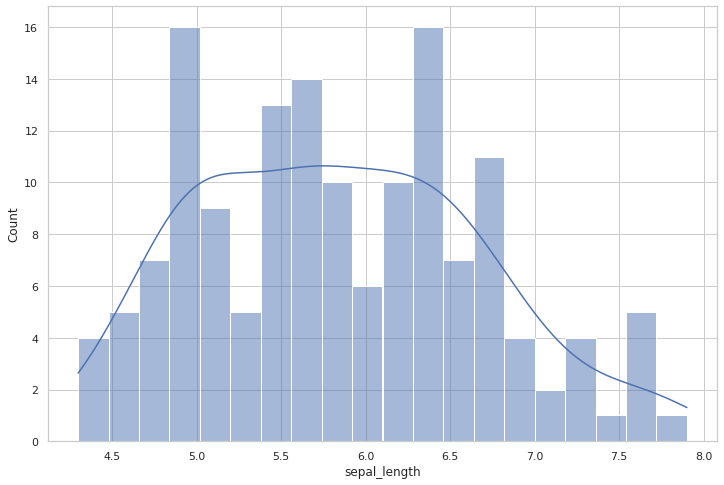

In [ ]:
# Controlling for the number of bins
sns.histplot(data=df, x="sepal_length", bins=20, kde=True)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.


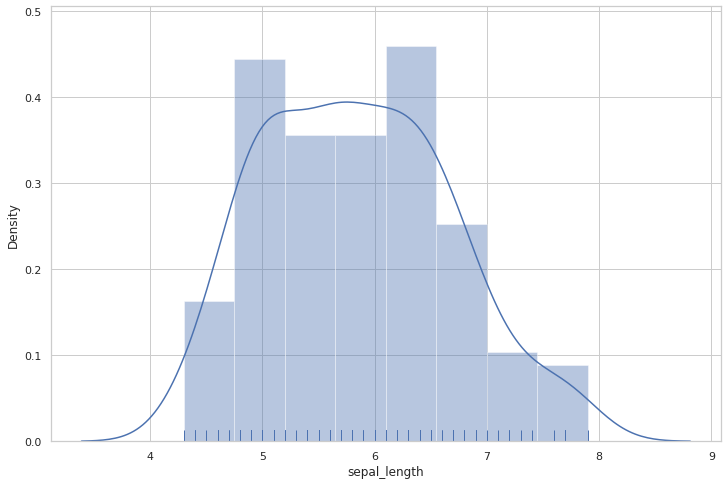

In [ ]:
# Histogram + rug + kernel density curve
sns.distplot(df["sepal_length"], kde=True, rug=True)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.


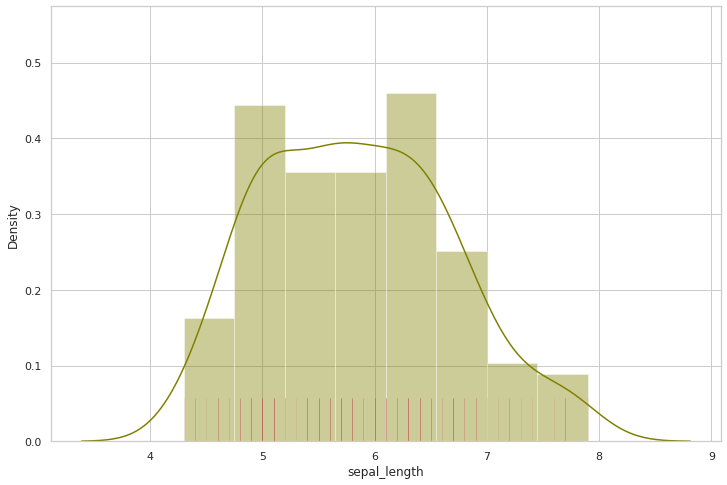

In [ ]:
# Histogram + rug (customized) + kernel density curve
sns.distplot(df["sepal_length"], kde=True,rug=True, color="olive",
             rug_kws={"color": "r", "alpha": 0.2, "linewidth": 0.5, "height":0.1})
plt.show()

In [ ]:
# Drawing a histogram and a boxplot on top of it

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


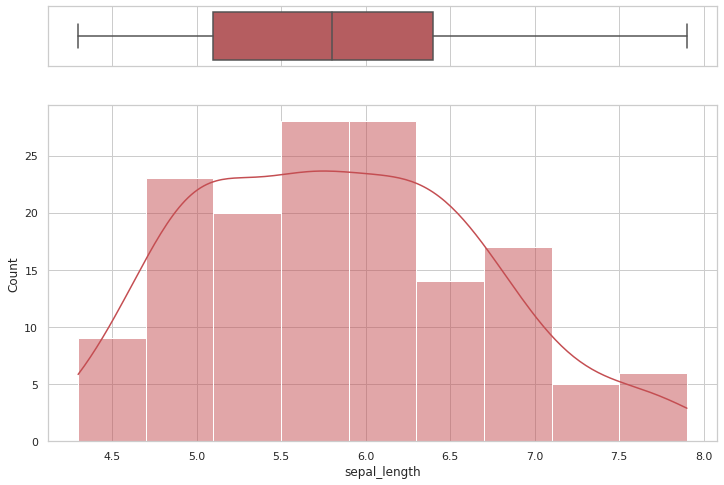

In [ ]:
# # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(df["sepal_length"], ax=ax_box, color= 'r')
sns.histplot(data=df, x="sepal_length", ax=ax_hist, kde=True, color='r')
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

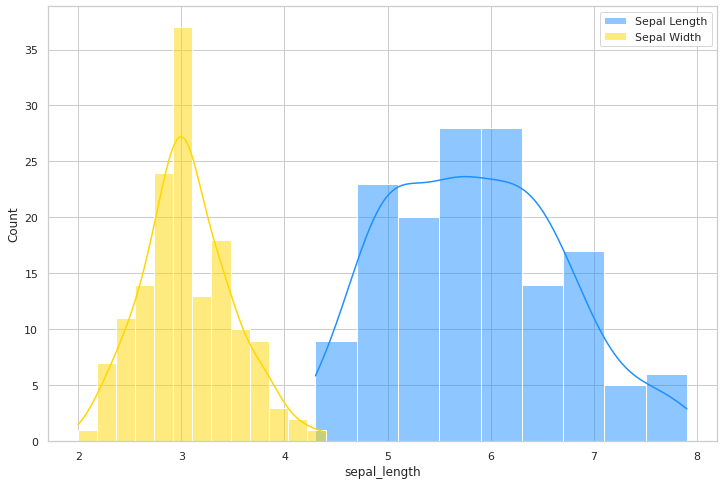

In [ ]:
# Plotting distributions on the same graph
sns.histplot(data=df, x="sepal_length", color="dodgerblue", label="Sepal Length", kde=True)
sns.histplot(data=df, x="sepal_width", color="gold", label="Sepal Width", kde=True)
plt.legend()
plt.show()

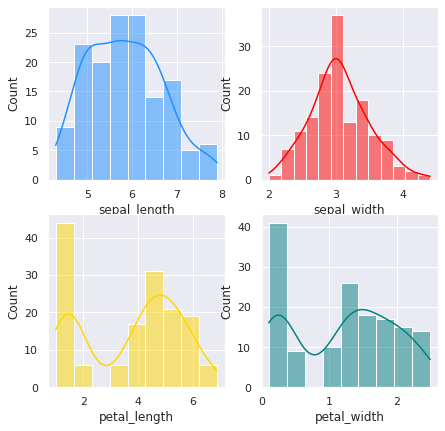

In [ ]:
# Splitting the figure in as much axes as needed
# more colors: https://matplotlib.org/stable/gallery/color/named_colors.html
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=df, x="sepal_length", kde=True, color="dodgerblue", ax=axs[0, 0])
sns.histplot(data=df, x="sepal_width", kde=True, color="red", ax=axs[0, 1])
sns.histplot(data=df, x="petal_length", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="petal_width", kde=True, color="teal", ax=axs[1, 1])

plt.show()


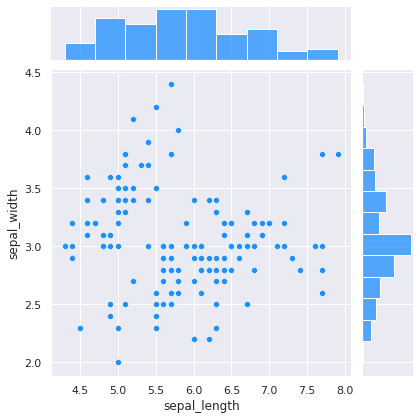

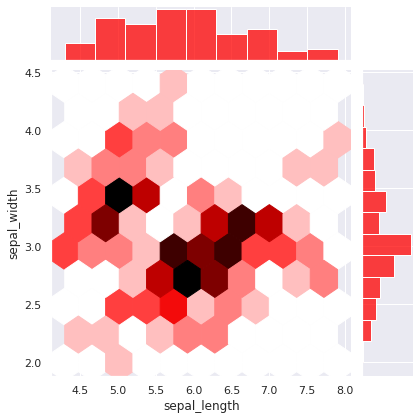

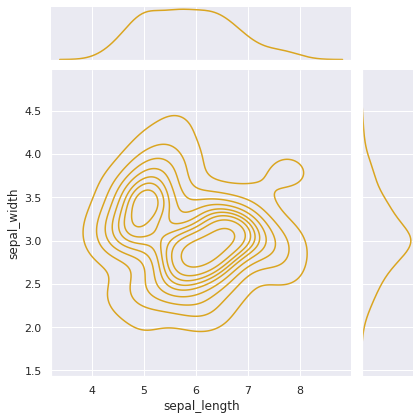

In [ ]:
# Marginal plots: usually on the top and right, show the distribution of 2 variables using histogram or density plot.
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”

sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='scatter', color = 'dodgerblue')
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='hex', color = 'red')
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='kde', color = 'goldenrod')
plt.show()

# BOXPLOT

A ```boxplot``` summarizes the distribution of a numeric variable for one or several groups. It allows to quickly get the median, quartiles and outliers but also hides the dataset individual data points. In python, boxplots are most of time done thanks to the boxplot function of the Seaborn library. Boxplots are also described in the

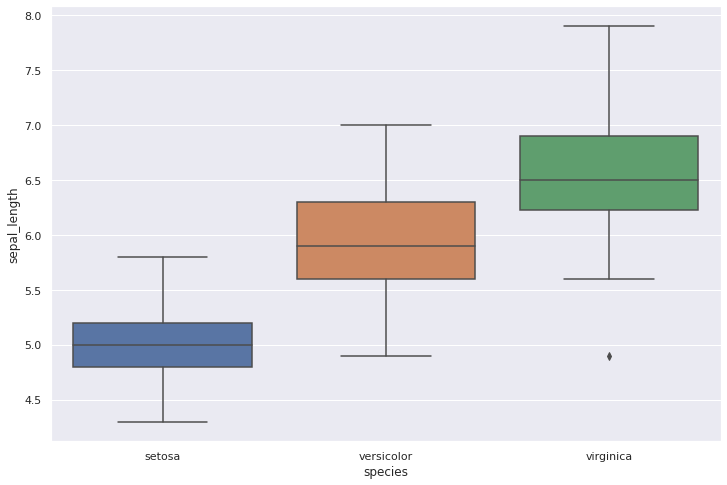

In [ ]:
# Simplest boxplot
sns.boxplot( x=df["species"], y=df["sepal_length"] )

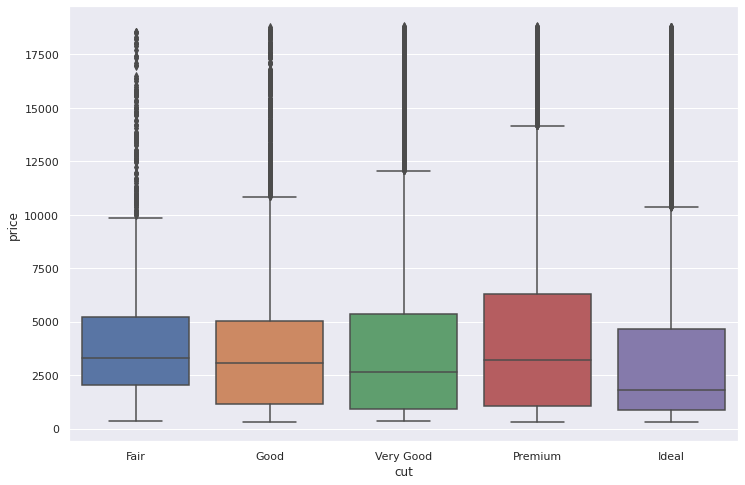

In [ ]:
# Boxplot + Jitter
from plotnine.data import diamonds # dataset
# boxplot
ax = sns.boxplot(x='cut', y='price', data=diamonds)
plt.show()

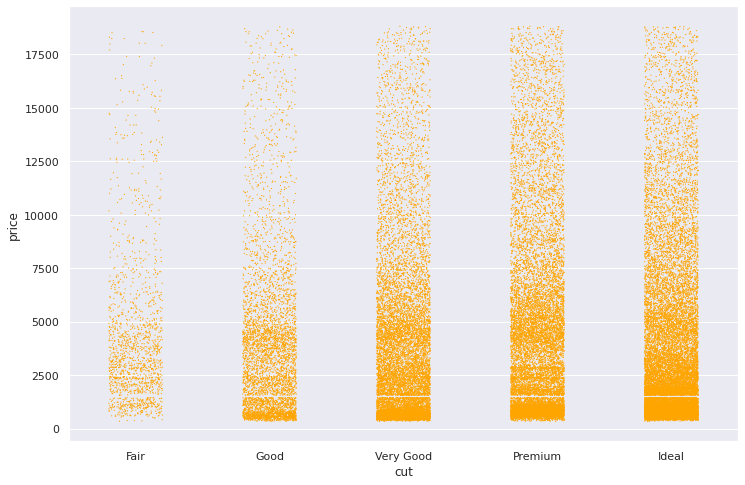

In [ ]:
# add stripplot
ax = sns.stripplot(x='cut', y='price', data=diamonds, color="orange", jitter=0.2, size=1.2)
plt.show()


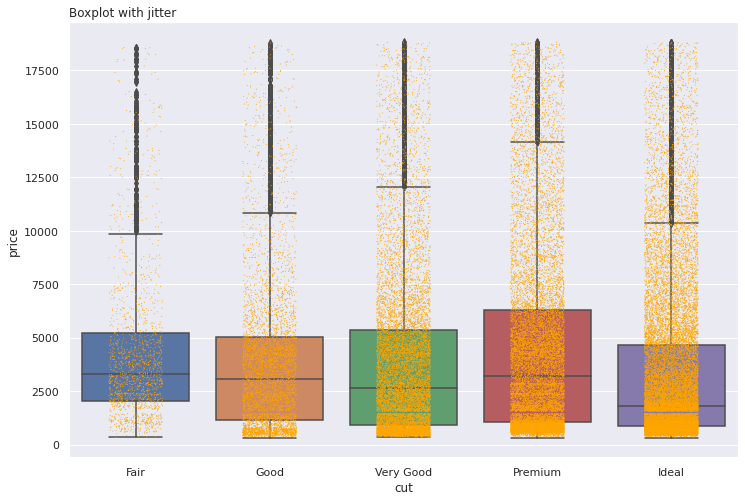

In [ ]:
# Boxplot + Jitter

from plotnine.data import diamonds # dataset
# boxplot
ax = sns.boxplot(x='cut', y='price', data=diamonds)
# add stripplot
ax = sns.stripplot(x='cut', y='price', data=diamonds, color="orange", jitter=0.2, size=1)
# add title
plt.title("Boxplot with jitter", loc="left")

# show the graph
plt.show()

In [ ]:
# Show Number of Observations

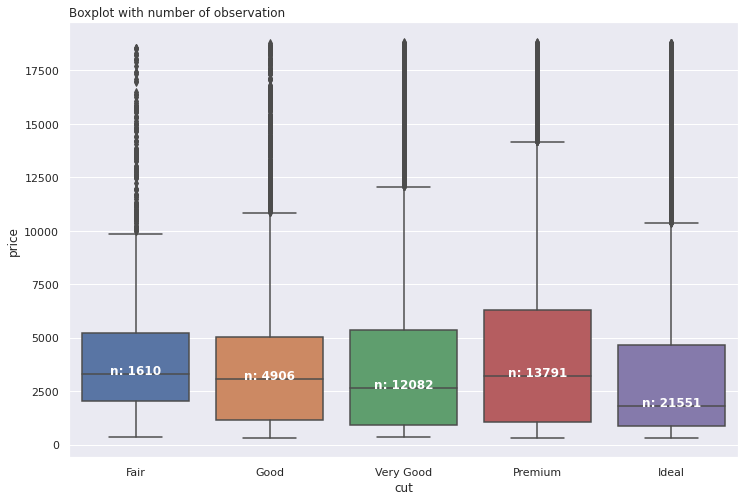

In [ ]:
# Start with a basic boxplot
sns.boxplot(x='cut', y='price', data=diamonds)
# Calculate number of obs per group & median to position labels
medians = diamonds.groupby(['cut'])['price'].median().values
nobs = diamonds.groupby("cut").size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    plt.text(pos[tick], medians[tick] + 0.4, nobs[tick], horizontalalignment='center', size='medium', color='w', weight='semibold')

# add title
plt.title("Boxplot with number of observation", loc="left")

# show the graph
plt.show()

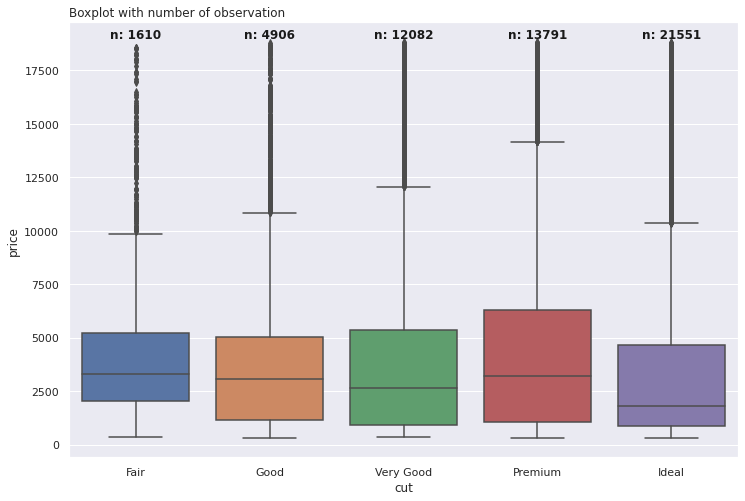

In [ ]:
# Start with a basic boxplot
sns.boxplot(x='cut', y='price', data=diamonds)
# Calculate number of obs per group & median to position labels
nobs = diamonds.groupby("cut").size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    plt.text(pos[tick], 19000, nobs[tick], horizontalalignment='center', size='medium', color='k', weight='semibold')

# add title
plt.title("Boxplot with number of observation", loc="left")

# show the graph
plt.show()

# Ridgeline

A ridgeline summarizes the distribution of a numeric variable for several groups. Each group is represented as a density chart, each density chart overlapping each other to use space more efficiently.

```Seaborn``` does not have a dedicated section to build ridgeline charts. It is still possible to make one using some workarounds involving several call of the ```kdeplot()``` function.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


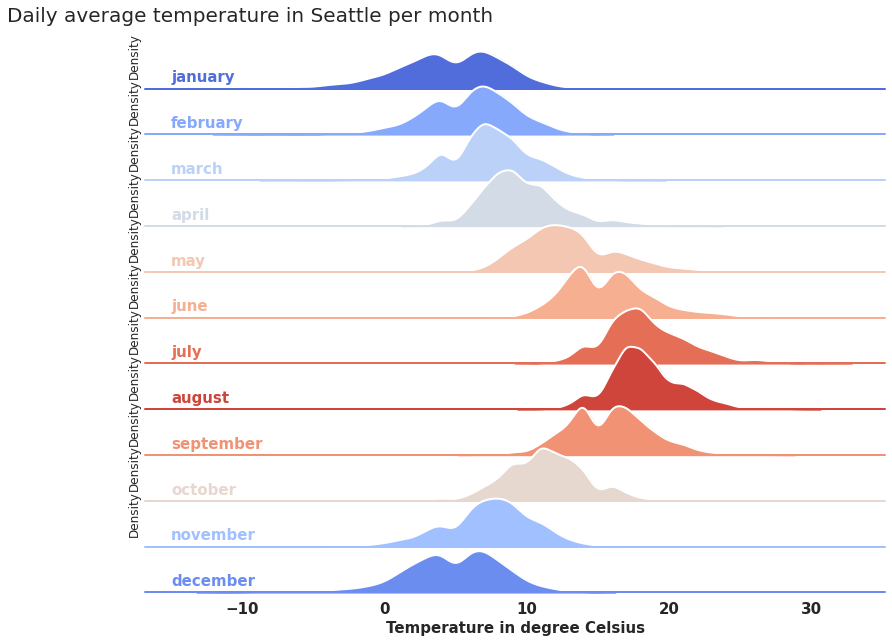

In [ ]:
# getting necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# getting the data
temp = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2016-weather-data-seattle.csv') # we retrieve the data from plotly's GitHub repository
temp['month'] = pd.to_datetime(temp['Date']).dt.month # we store the month in a separate column

# we define a dictionnary with months that we'll use later
month_dict = {1: 'january', 2: 'february', 3: 'march', 4: 'april', 5: 'may', 6: 'june',
              7: 'july', 8: 'august', 9: 'september', 10: 'october', 11: 'november', 12: 'december'}

# we create a 'month' column
temp['month'] = temp['month'].map(month_dict)

# we generate a pd.Serie with the mean temperature for each month (used later for colors in the FacetGrid plot), and we create a new column in temp dataframe
month_mean_serie = temp.groupby('month')['Mean_TemperatureC'].mean()
temp['mean_month'] = temp['month'].map(month_mean_serie)

# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=12)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(temp, row='month', hue='mean_month', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'Mean_TemperatureC',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'Mean_TemperatureC',
      bw_adjust=1, clip_on=False,
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.02, month_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())

# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Temperature in degree Celsius', fontweight='bold', fontsize=15)
plt.ylabel('', fontweight='bold', fontsize=15)
g.fig.suptitle('Daily average temperature in Seattle per month',
               ha='right',
               fontsize=20,
               fontweight=20)

plt.show()


# SCATTER PLOT

A scatter plot displays the relationship between 2 numeric variables. Each data point is represented as a circle. Several tools allow to build one in python, this section provides code samples for Seaborn, Matplotlib and Plotly for interactive versions. Note that this online course has a chapter dedicated to scatterplots.

In [ ]:
# iris dataset
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa

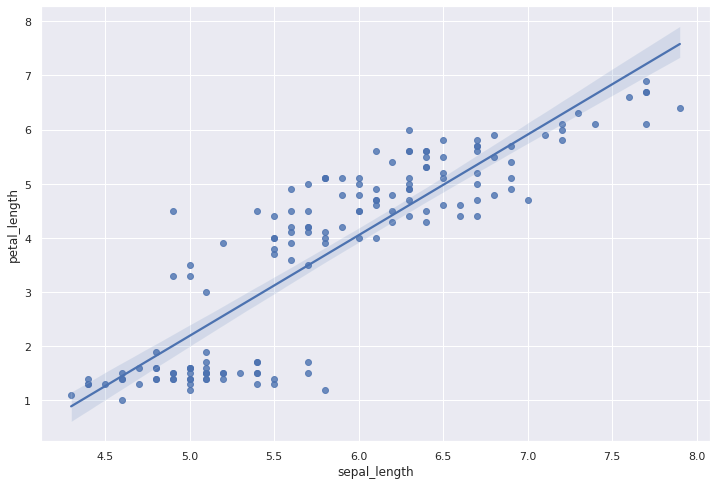

In [ ]:

# use the function regplot to make a scatterplot
sns.regplot(x="sepal_length", y="petal_length", data = df)

In [ ]:
from scipy.stats import describe
# library & dataset
from plotnine.data import diamonds # dataset
diamonds.info()
diamonds.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31

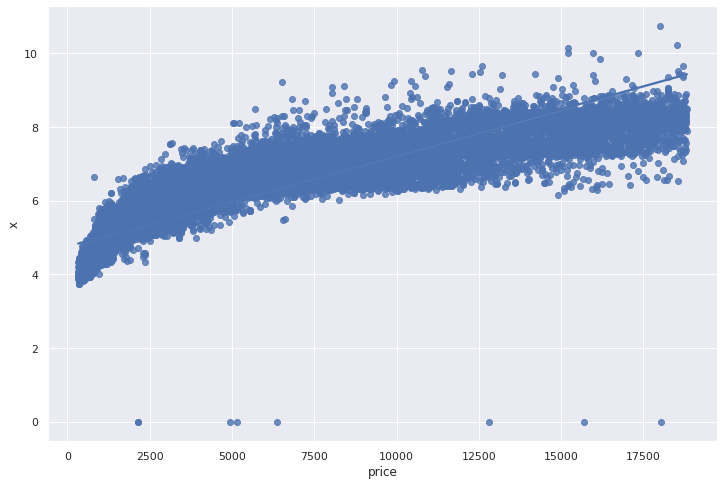

In [ ]:
# use the function regplot to make a scatterplot
sns.regplot(x=diamonds["price"], y=diamonds["x"])

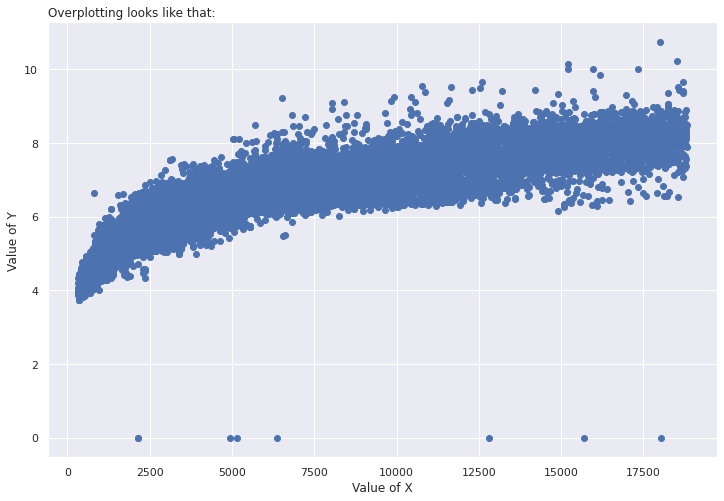

In [ ]:
# How to avoid overplotting with python
plt.plot( 'price', 'x', "", data=diamonds, linestyle='', marker='o')
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting looks like that:', loc='left')
plt.show()

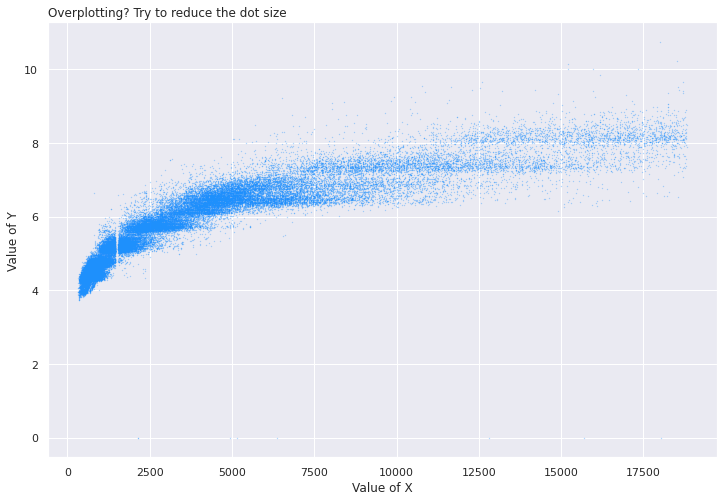

In [ ]:
# Plot with small marker size
plt.plot( 'price', 'x', "", data=diamonds, linestyle='', marker='o',
         markersize=0.3, alpha=0.5, color="dodgerblue")
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting? Try to reduce the dot size', loc='left')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: y, shade. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


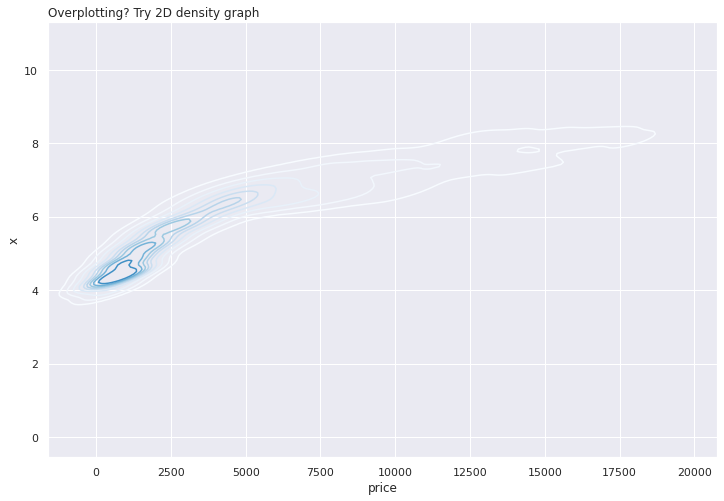

In [ ]:
# 2D Density
sns.kdeplot('price', 'x', "", data=diamonds, cmap="Blues", shade=True)
plt.title('Overplotting? Try 2D density graph', loc='left')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


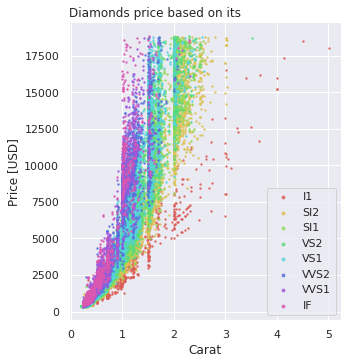

In [ ]:
# Grouping (colors: https://seaborn.pydata.org/tutorial/color_palettes.html?highlight=colors)
sns.lmplot( 'carat', 'price', data=diamonds, fit_reg=False, hue='clarity',
           legend=False, palette="hls", scatter_kws={"alpha":0.8,"s":2} )

plt.legend(loc='lower right', markerscale=2)

# titles
plt.xlabel('Carat')
plt.ylabel('Price [USD]')
plt.title('Diamonds price based on its ', loc='left')
plt.show()

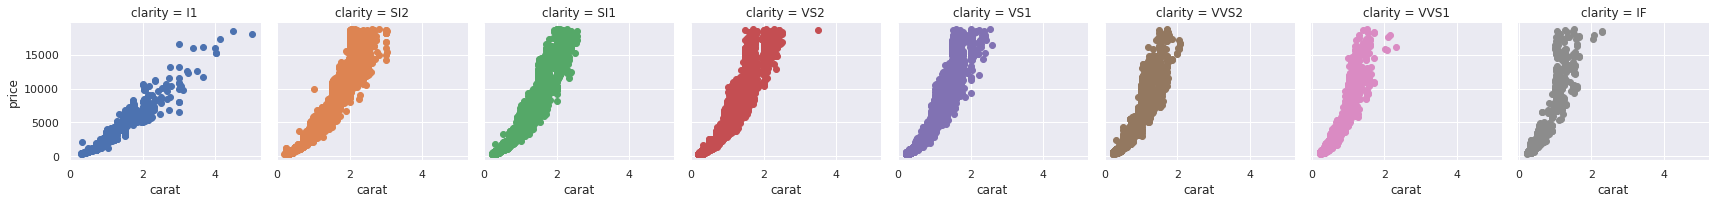

In [ ]:
# Use seaborn for easy faceting
g = sns.FacetGrid(diamonds, col="clarity", hue="clarity")
g = (g.map(plt.scatter, "carat", "price"))

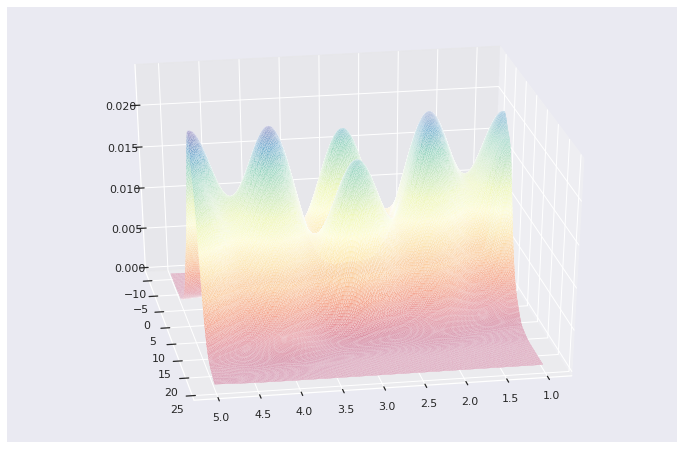

In [ ]:
# 3D plot
# libraries
from scipy.stats import kde
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
a=np.concatenate([np.random.normal(2, 4, 1000), np.random.normal(4, 4, 1000),
                  np.random.normal(1, 2, 500), np.random.normal(10, 2, 500),
                  np.random.normal(8, 4, 1000), np.random.normal(10, 4, 1000)])
df=pd.DataFrame({'x': np.repeat( range(1,6), 1000), 'y': a })
nbins=300
k = kde.gaussian_kde([df.x,df.y])
xi, yi = np.mgrid[ df.x.min():df.x.max():nbins*1j, df.y.min():df.y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# Transform it in a dataframe
data=pd.DataFrame({'x': xi.flatten(), 'y': yi.flatten(), 'z': zi })

# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(data.x, data.y, data.z, cmap=plt.cm.Spectral, linewidth=0.2)

# Adapt angle, first number is up/down, second number is right/left
ax.view_init(30, 80)

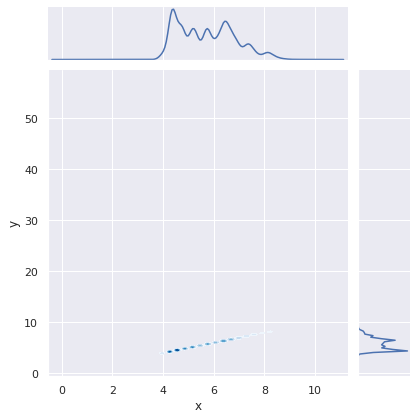

In [ ]:
# Marginal Distribution
# 2D density + marginal distribution:
sns.jointplot(x=diamonds.x, y=diamonds.y, cmap="Blues", shade=True, kind='kde')
plt.show()

# HEATMAPS
A heatmap is a graphical representation of data where each value of a matrix is represented as a color. This page explains how to build a heatmap with Python, with an emphasis on the Seaborn library. Note that this online course is another way to learn about heatmaps with python.

          a         b         c         d         e
0  0.967251  0.071956  0.829226  0.043785  0.766005
1  0.449732  0.707174  0.658698  0.375294  0.206786


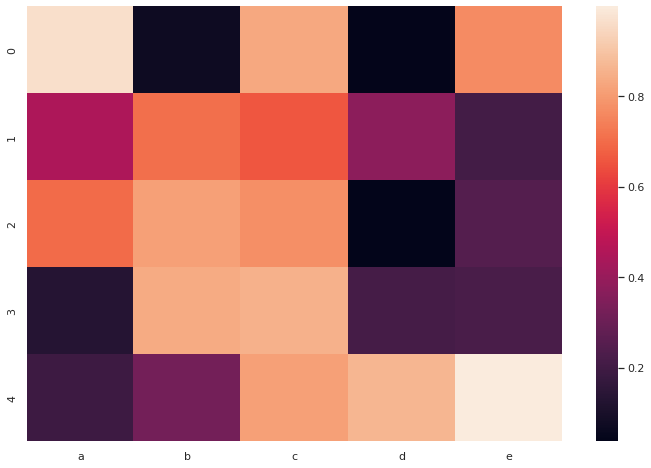

In [ ]:
# library
import seaborn as sns
import pandas as pd
import numpy as np

# Create a dataset
df = pd.DataFrame(np.random.random((5,5)), columns=["a","b","c","d","e"])
print(df.head(2))
# Default heatmap
p1 = sns.heatmap(df)

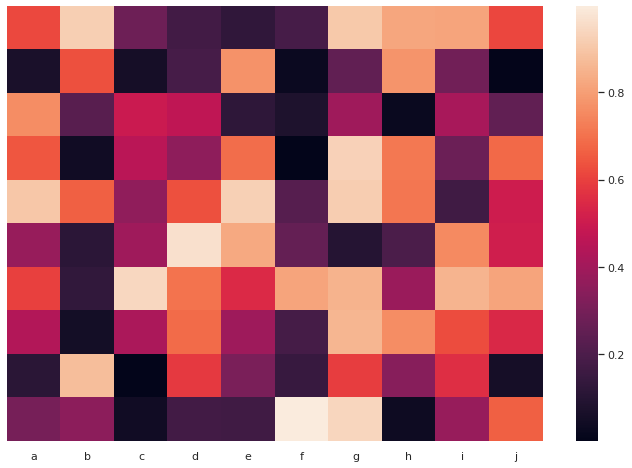

In [ ]:
# Create a dataset
df = pd.DataFrame(np.random.random((10,10)), columns=["a","b","c","d","e","f","g","h","i","j"])
# plot a heatmap
sns.heatmap(df, yticklabels=False)

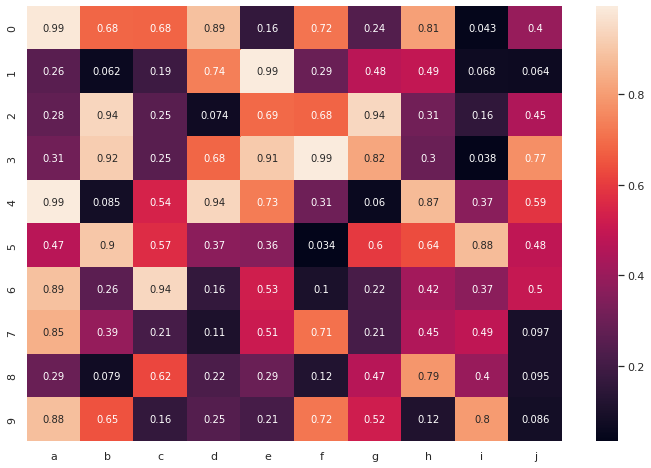

In [ ]:
# Annotate each cell with value
# Create a dataset
df = pd.DataFrame(np.random.random((10,10)), columns=["a","b","c","d","e","f","g","h","i","j"])
# plot a heatmap with annotation
sns.heatmap(df, annot=True, annot_kws={"size": 10})

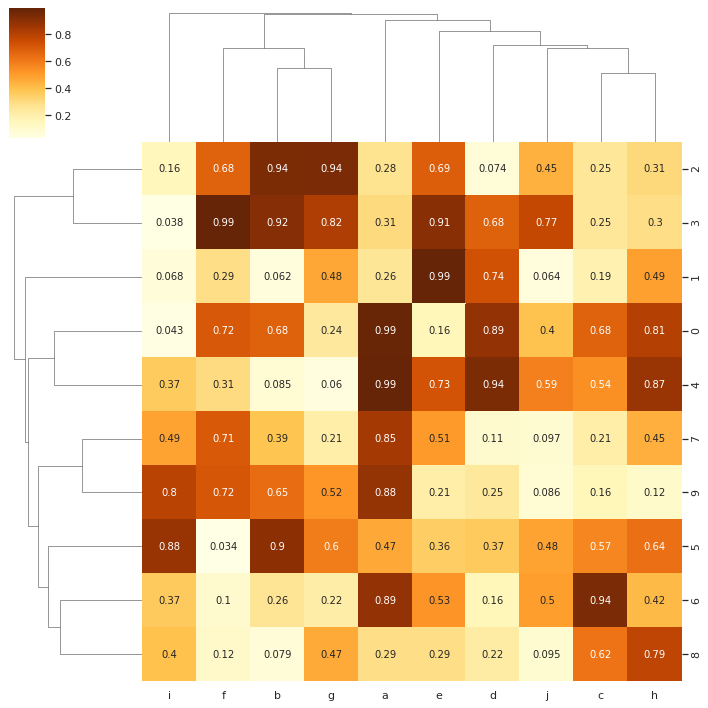

In [ ]:
# Default plot
sns.clustermap(df, annot=True, annot_kws={"size": 10}, cmap="YlOrBr")
# Show the graph
plt.show()

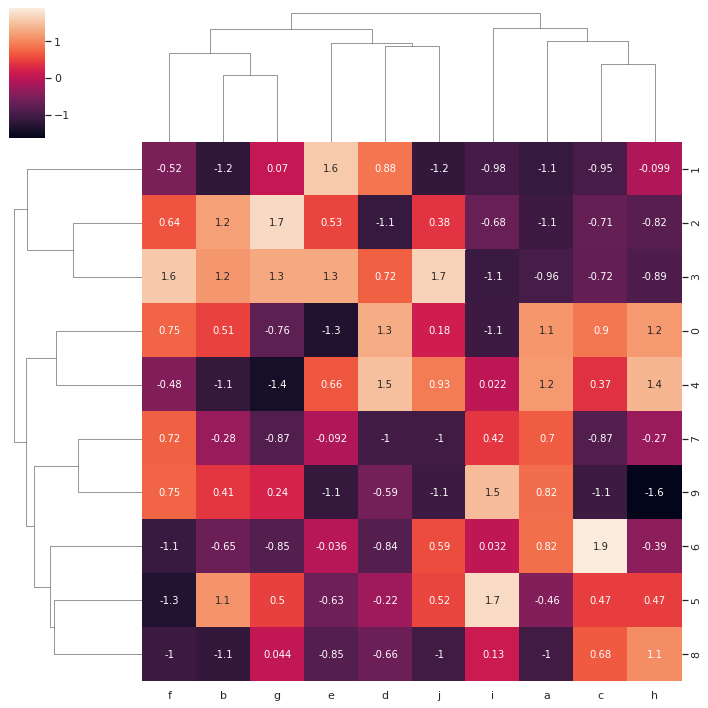

In [ ]:
sns.clustermap(df, z_score=1, annot=True, annot_kws={"size": 10})
plt.show()

# CORRELOGRAM
A correlogram or correlation matrix allows to analyse the relationship between each pair of numeric variables of a matrix. The correlation is visualised as a scatterplot. The diagonal represents the distribution of each variable with a histogram or a density plot.

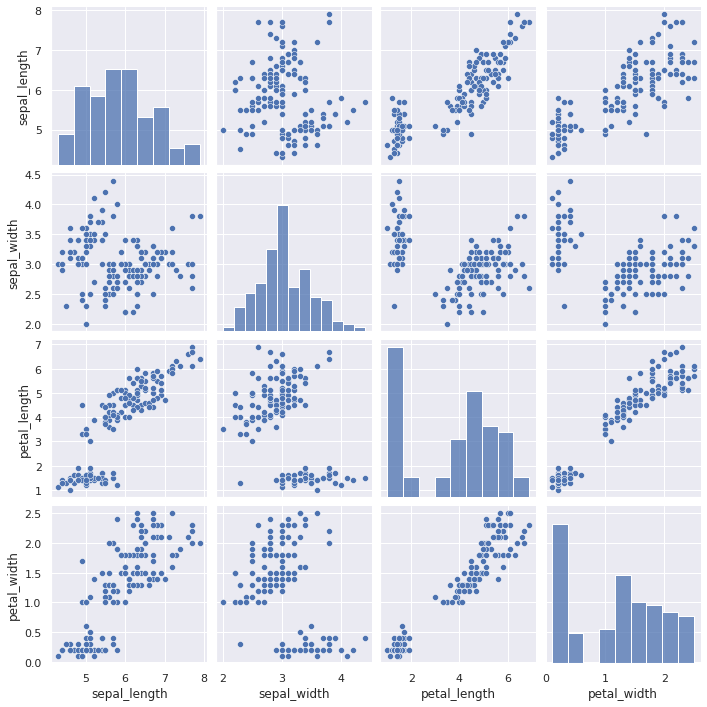

In [ ]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('iris')
# Basic correlogram
sns.pairplot(df)
plt.show()

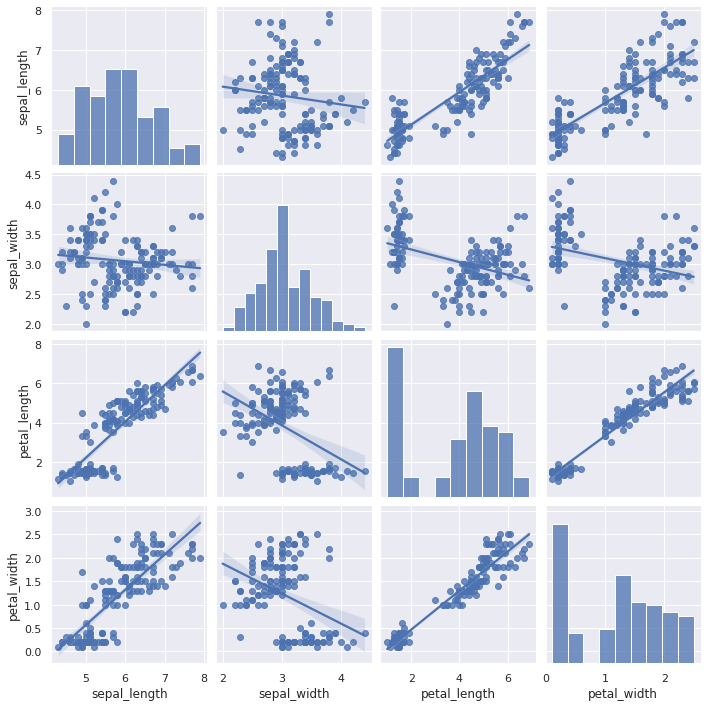

In [ ]:
# with regression
sns.pairplot(df, kind="reg")
plt.show()

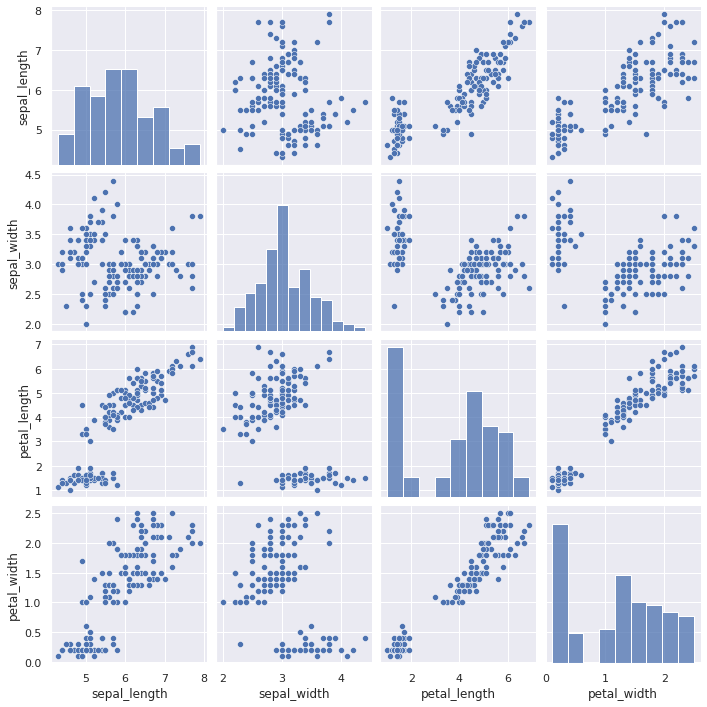

In [ ]:
# without regression
sns.pairplot(df, kind="scatter")
plt.show()

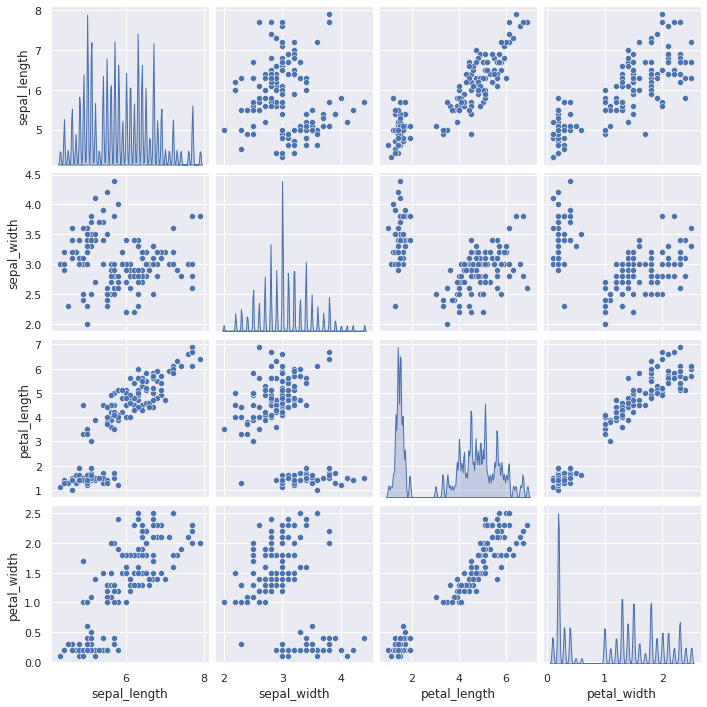

In [ ]:
# You can custom it as a density plot or histogram so see the related sections
sns.pairplot(df, diag_kind="kde", diag_kws=dict(shade=True, bw_adjust=.05, vertical=False) )
plt.show()

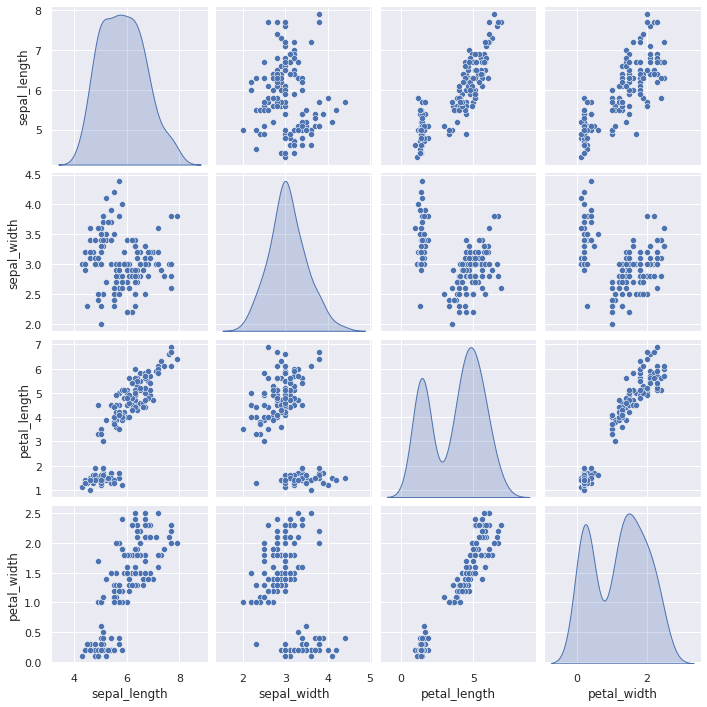

In [ ]:
# Density
sns.pairplot(df, diag_kind="kde")
plt.show()

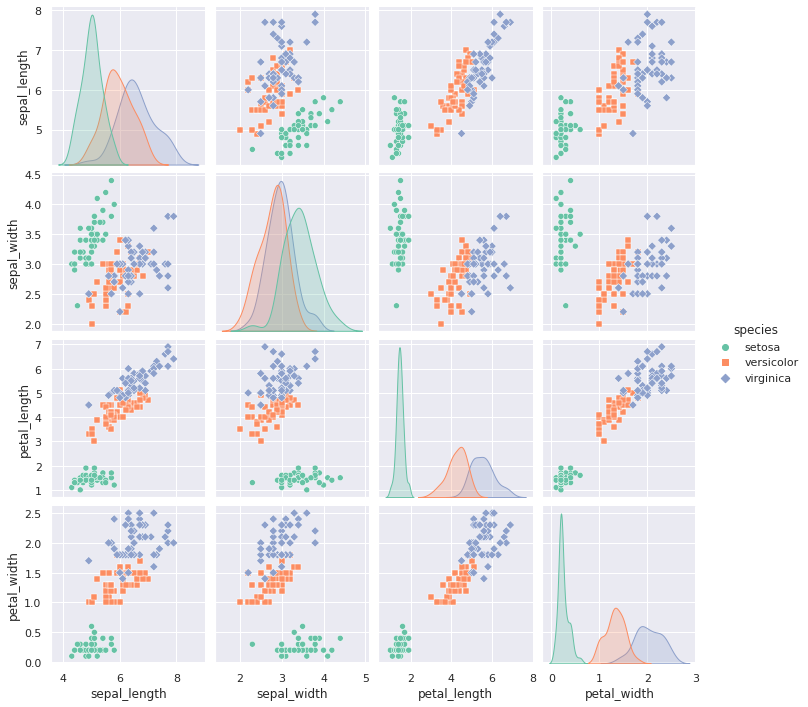

In [ ]:
# left
sns.pairplot(df, kind="scatter", hue="species", markers=["o", "s", "D"], palette="Set2")
plt.show()


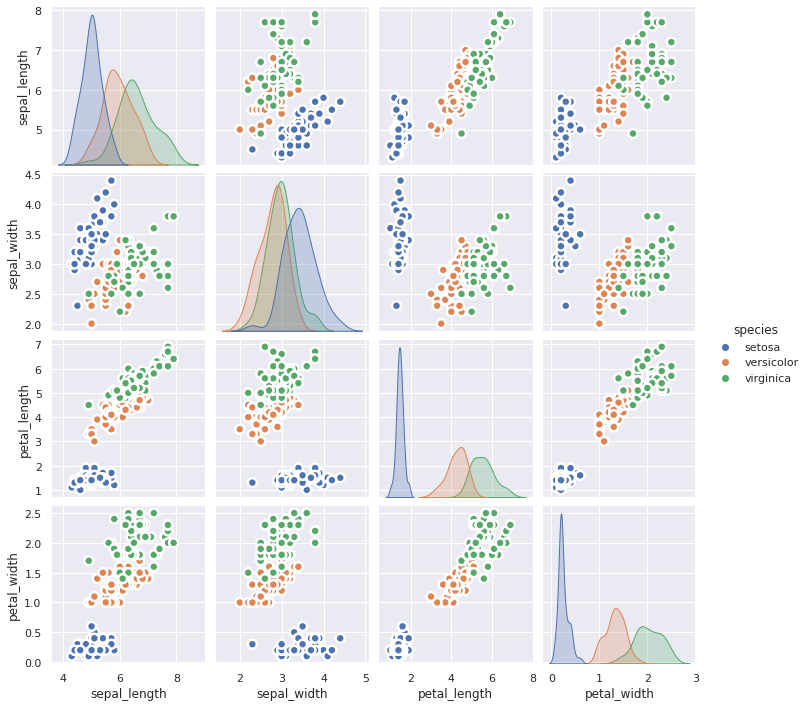

In [ ]:
# right: you can give other arguments with plot_kws.
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

# BUBBLE PLOT
A bubble plot is a scatterplot where the circle size is mapped to the value of a third numeric variable. This section shows many bubble plots made with Python, using both the Matplotlib and Seaborn libraries.

In [ ]:
pip install gapminder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns
from gapminder import gapminder # data set

In [ ]:
# data
data = gapminder.loc[gapminder.year == 2007]
data.head(3)

country continent  year  lifeExp       pop    gdpPercap
11  Afghanistan      Asia  2007   43.828  31889923   974.580338
23      Albania    Europe  2007   76.423   3600523  5937.029526
35      Algeria    Africa  2007   72.301  33333216  6223.367465

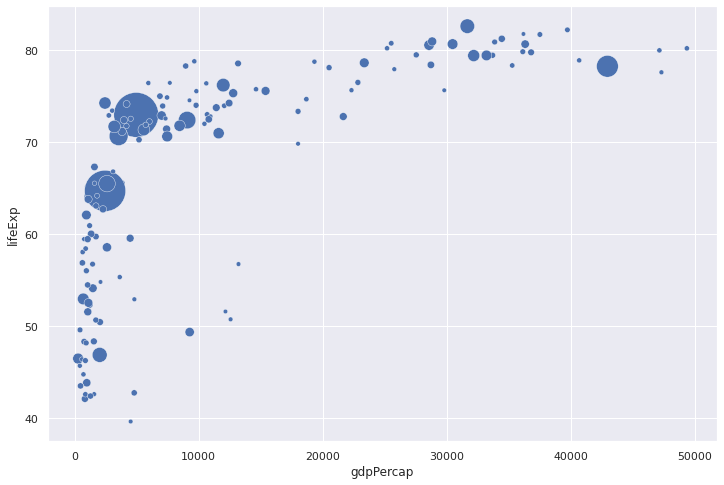

In [ ]:
# use the scatterplot function to build the bubble map
sns.scatterplot(data=data, x="gdpPercap", y="lifeExp", size="pop",
                legend=False, sizes=(20, 2000))
# show the graph
plt.show()

<ipython-input-259-90b794f1c66e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-259-90b794f1c66e>:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


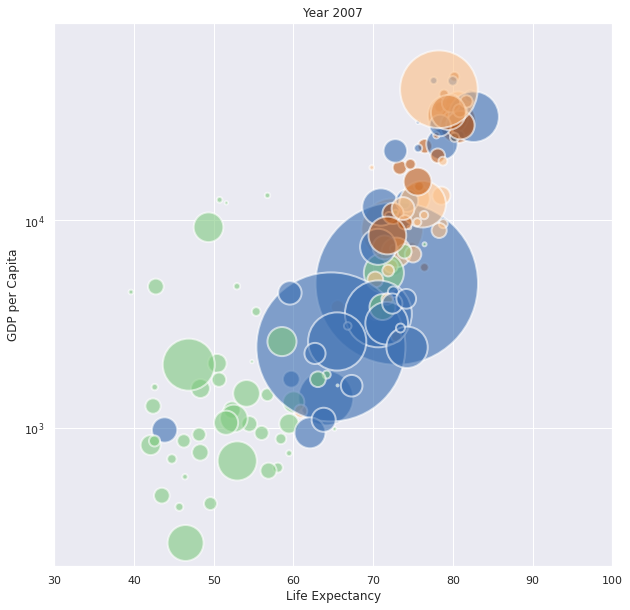

In [ ]:
# use the scatterplot function to build the bubble map
data['continent']=pd.Categorical(data['continent'])
plt.figure(figsize=(10, 10))

# Scatterplot
plt.scatter(x = data['lifeExp'], y = data['gdpPercap'],
    s=data['pop']/50000, c=data['continent'].cat.codes,
    cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2);

# Add titles (main and on axis)
plt.yscale('log')
plt.xlabel("Life Expectancy")
plt.ylabel("GDP per Capita")
plt.title("Year 2007")
plt.ylim(0,90000)
plt.xlim(30, 100);

<ipython-input-264-af935833e06e>:35: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


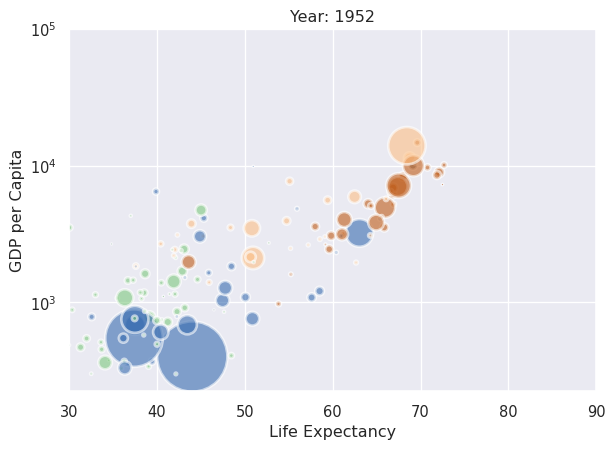

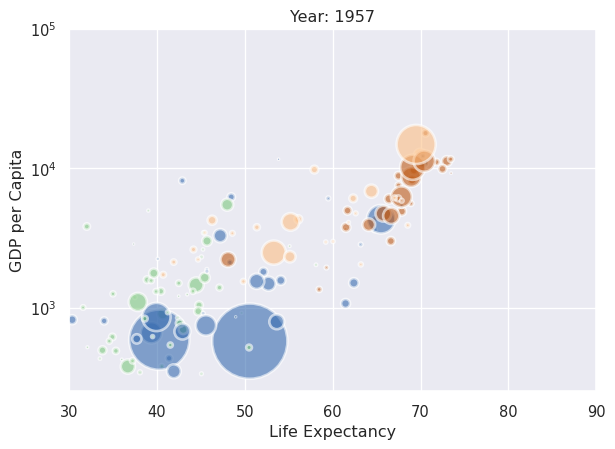

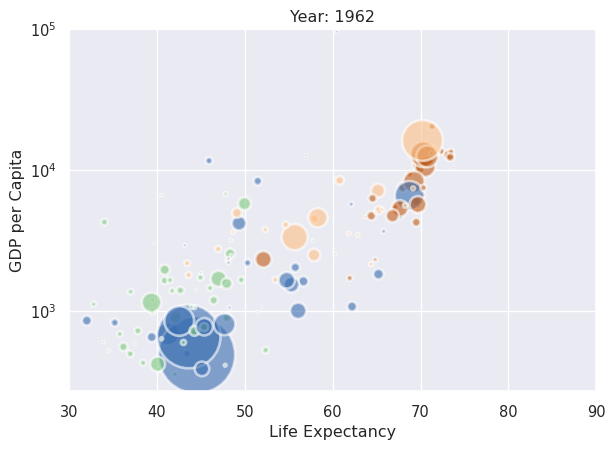

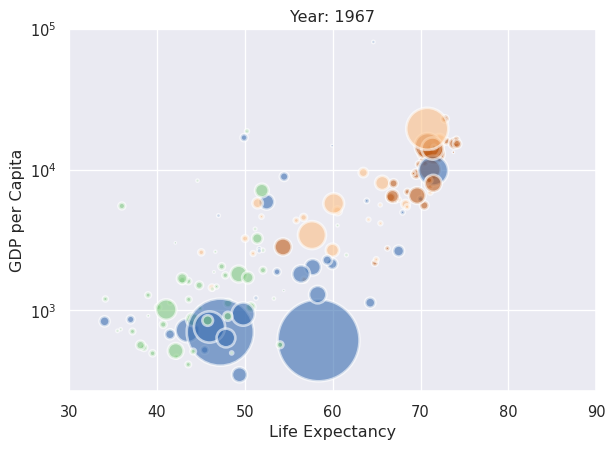

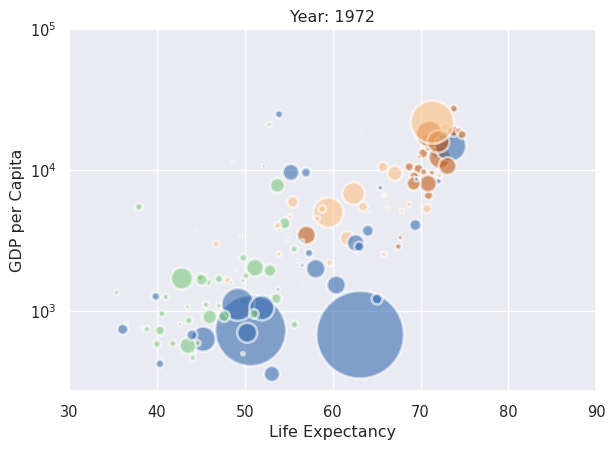

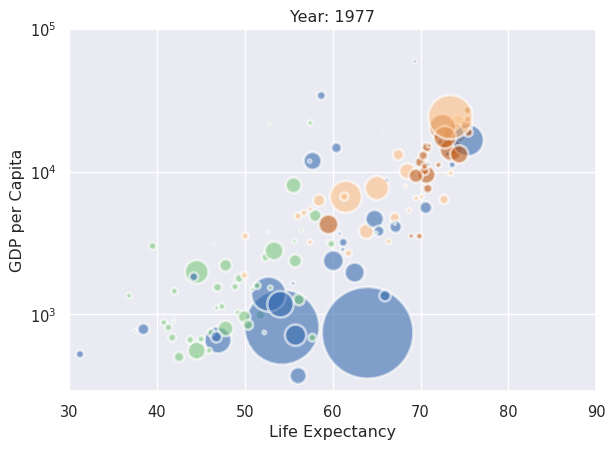

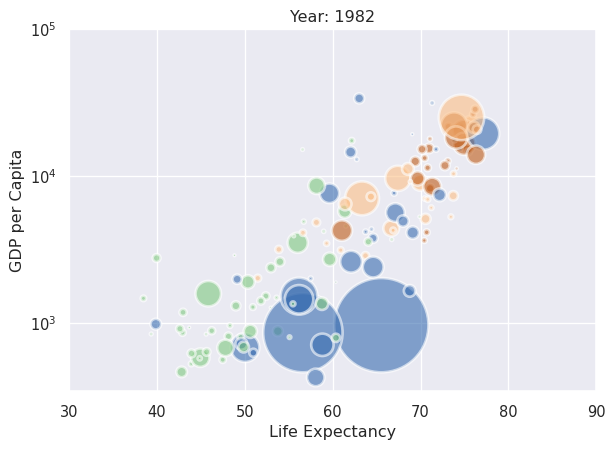

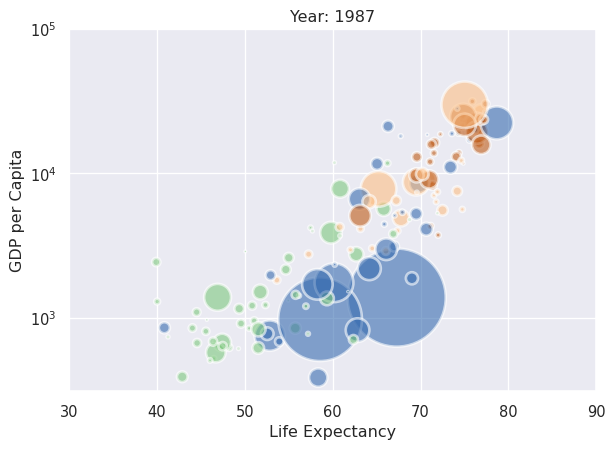

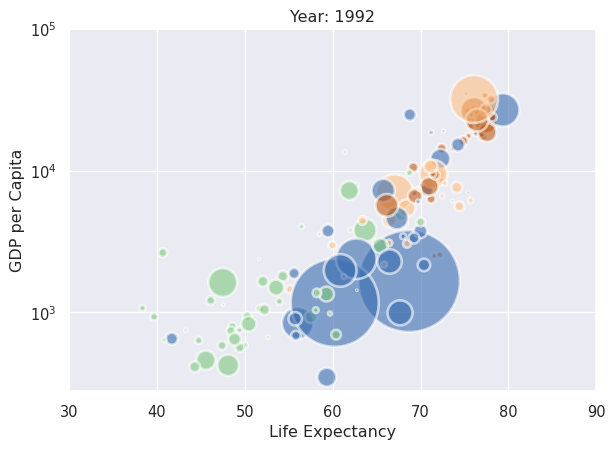

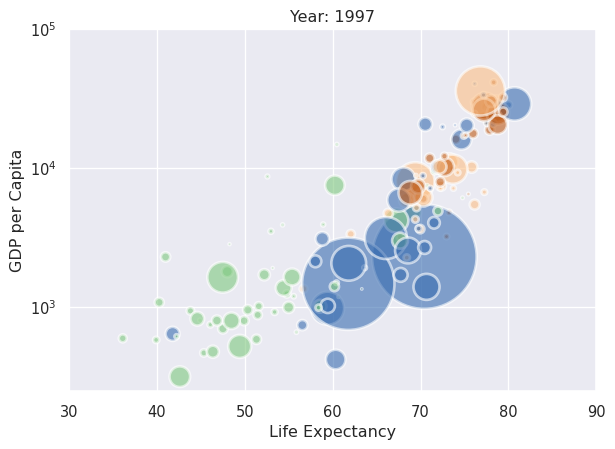

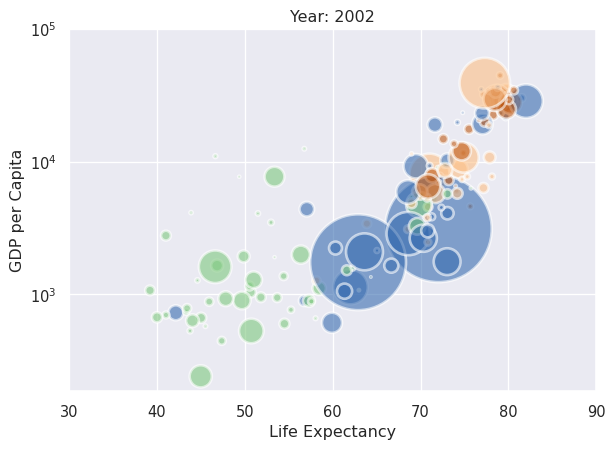

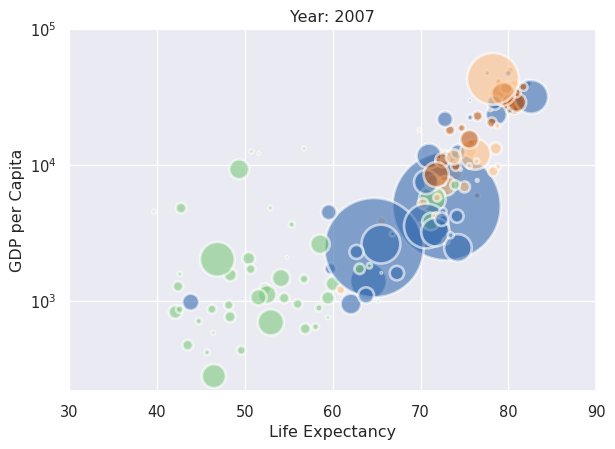

In [ ]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
# read the data (on the web)
data = pd.read_csv('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/gapminderData.csv')
data['continent']=pd.Categorical(data['continent'])
# image resolution
dpi=96

# For each year:
for i in data.year.unique():

    # Turn interactive plotting off
    plt.ioff()

    # initialize a figure
    fig = plt.figure(figsize=(680/dpi, 480/dpi), dpi=dpi)

    # Find the subset of the dataset for the current year
    subsetData = data[ data.year == i ]

    # Build the scatterplot
    plt.scatter(
        x=subsetData['lifeExp'],
        y=subsetData['gdpPercap'],
        s=subsetData['pop']/200000 ,
        c=subsetData['continent'].cat.codes,
        cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)

    # Add titles (main and on axis)
    plt.yscale('log')
    plt.xlabel("Life Expectancy")
    plt.ylabel("GDP per Capita")
    plt.title("Year: "+str(i) )
    plt.ylim(0,100000)
    plt.xlim(30, 90)

    # Save it & close the figure
    plt.show()

In [ ]:
pip install palmerpenguins

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import palmerpenguins
data = palmerpenguins.load_penguins()
data.head(3)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007

In [ ]:
FLIPPER_LENGTH = data["flipper_length_mm"].values
BILL_LENGTH = data["bill_length_mm"].values
SPECIES = data["species"].values
SPECIES_ = np.unique(SPECIES)
COLORS = ["#1B9E77", "#D95F02", "#7570B3"]

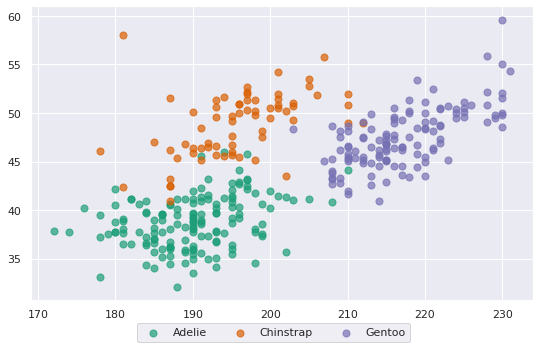

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
for species, color in zip(SPECIES_, COLORS):
    idxs = np.where(SPECIES == species)
    ax.scatter(FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs], label=species,
        s=50, color=color, alpha=0.7)
# Make room on below
fig.subplots_adjust(bottom=0.2)
# Again, leave some extra space for the axis tick labels
ax.legend(loc="upper center", ncol=3, bbox_to_anchor=(0.5, 0.16),
    bbox_transform=fig.transFigure);

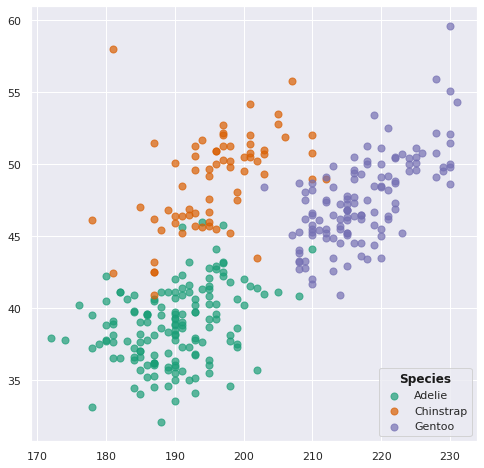

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
for species, color in zip(SPECIES_, COLORS):
    idxs = np.where(SPECIES == species)
    ax.scatter(FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs], label=species,
        s=50, color=color, alpha=0.7)
# Legend without title
legend = ax.legend(loc="lower right")
# Set title manually. Just specify the text.
legend.set_title("Species")
# Object of class 'matplotlib.text.Text'.
# We can use any of the methods we have used for the label texts above.
title = legend.get_title()
title.set_color("k")
title.set_weight("bold")
title.set_size(12)

# BARPLOT
A barplot shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value. This section shows how to build a barplot with Python, using Matplotlib and Seaborn. Note that this online course has a chapter dedicated to barplots.

In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

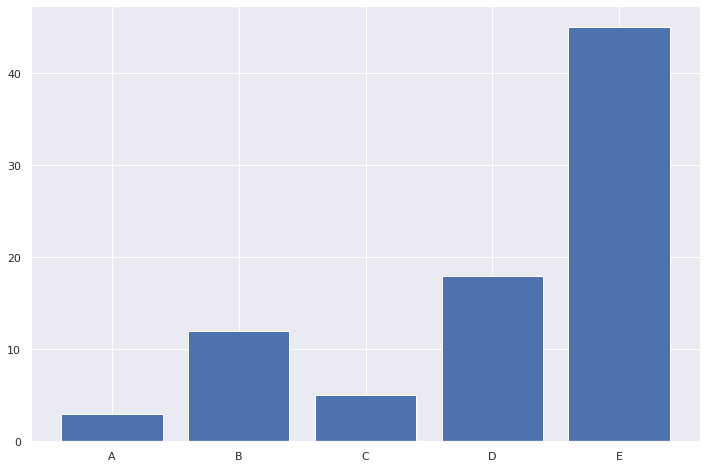

In [ ]:
# Make a random dataset:
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
x_pos = np.arange(len(bars))
# Create bars
plt.bar(x_pos, height)
plt.xticks(x_pos, bars)
plt.show()

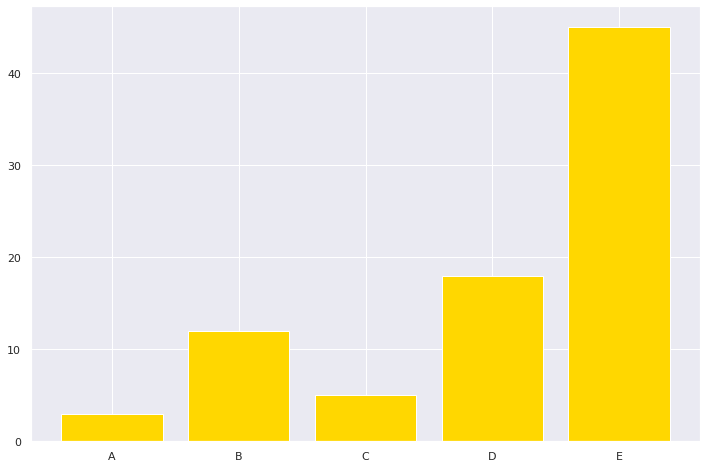

In [ ]:
# Uniform color
plt.bar(y_pos, height, color='gold')
plt.xticks(x_pos, bars)
plt.show()

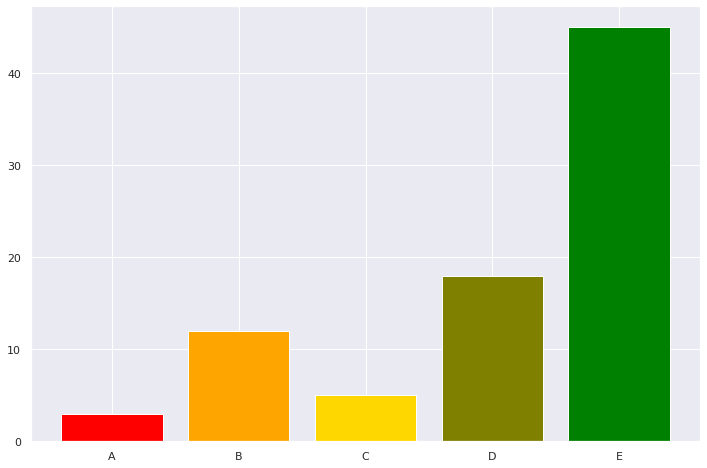

In [ ]:
# Different color for each bar
plt.bar(y_pos, height, color=['red', 'orange', 'gold', 'olive', 'green'])
plt.xticks(x_pos, bars)
plt.show()

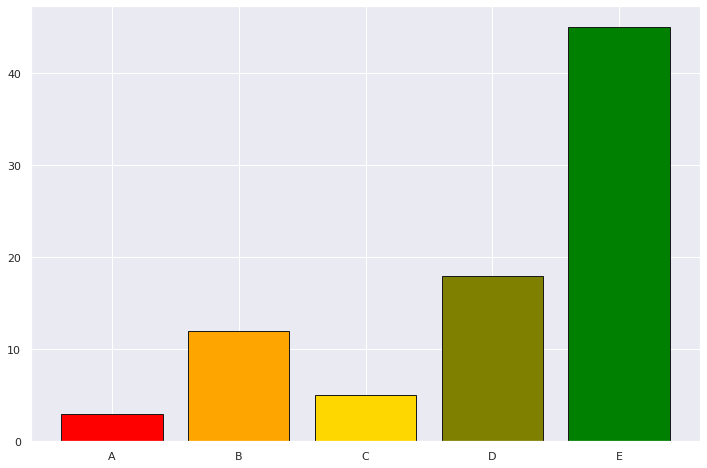

In [ ]:
# Different color for each bar + Control color of border
plt.bar(y_pos, height, color=['red', 'orange', 'gold', 'olive', 'green'],
        edgecolor='k')
plt.xticks(x_pos, bars)
plt.show()

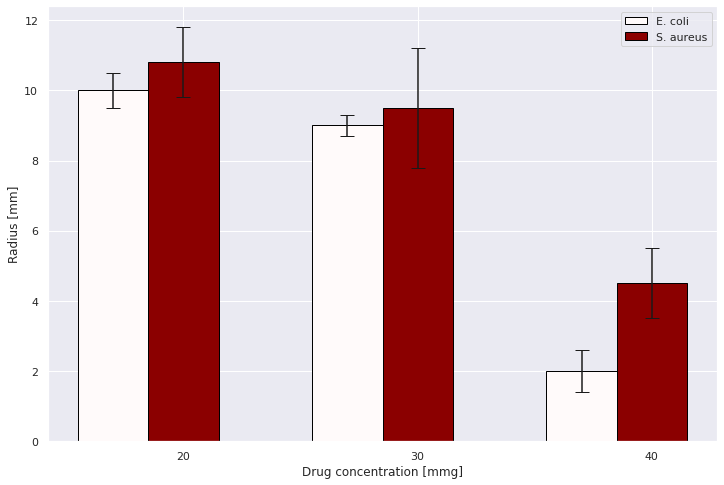

In [ ]:
# Add confidence interval on barplot
barWidth = 0.3
# Choose the height of bars
bars1 = [10, 9, 2]
bars2 = [10.8, 9.5, 4.5]
# Choose the height of the error bars
yer1 = [0.5, 0.3, 0.6]
yer2 = [1, 1.7, 1]

# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Create bars
plt.bar(r1, bars1, width = barWidth, color = 'snow', edgecolor = 'black', yerr=yer1, capsize=7, label='E. coli')
plt.bar(r2, bars2, width = barWidth, color = 'darkred', edgecolor = 'black', yerr=yer2, capsize=7, label='S. aureus')

# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['20', '30', '40'])
plt.ylabel('Radius [mm]')
plt.xlabel('Drug concentration [mmg]')
plt.legend()

# Show graphic
plt.show()

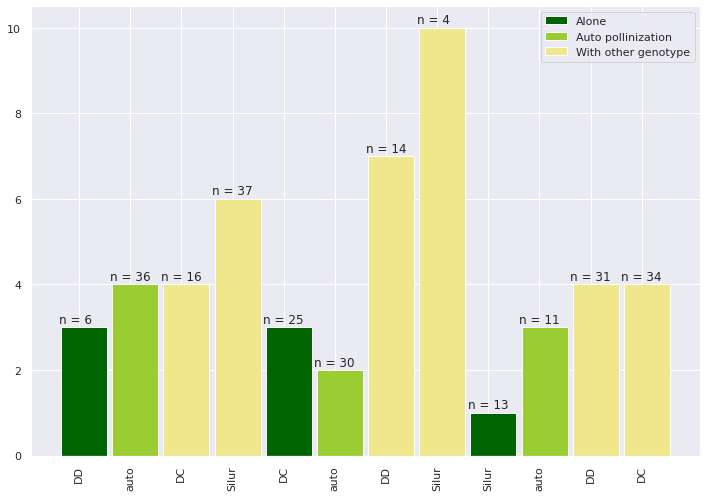

In [ ]:
# Create bars
barWidth = 0.9
bars1 = [3, 3, 1]
bars2 = [4, 2, 3]
bars3 = [4, 6, 7, 10, 4, 4]
bars4 = bars1 + bars2 + bars3

# The X position of bars
r1 = [1,5,9]
r2 = [2,6,10]
r3 = [3,4,7,8,11,12]
r4 = r1 + r2 + r3

# Create barplot
plt.bar(r1, bars1, width = barWidth, color = 'darkgreen', label='Alone')
plt.bar(r2, bars2, width = barWidth, color = 'yellowgreen', label='Auto pollinization')
plt.bar(r3, bars3, width = barWidth, color = 'khaki', label='With other genotype')
plt.legend()
# Text below each barplot with a rotation at 90°
plt.xticks([r + barWidth for r in range(len(r4))],
           ['DD', 'auto', 'DC', 'Silur', 'DC', 'auto',
            'DD', 'Silur', 'Silur', 'auto', 'DD', 'DC'], rotation=90)
# Create labels
label = ['n = 6', 'n = 25', 'n = 13', 'n = 36', 'n = 30', 'n = 11',
         'n = 16', 'n = 37', 'n = 14', 'n = 4', 'n = 31', 'n = 34']
# Text on the top of each bar
for i in range(len(r4)):
    plt.text(x = r4[i]-0.5 , y = bars4[i]+0.1, s = label[i], size = 12)
# Adjust the margins
plt.subplots_adjust(bottom= 0.2, top = 0.98)
plt.show()

In [ ]:
# Dataset
tips = sns.load_dataset("tips")
tips.head(2)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3

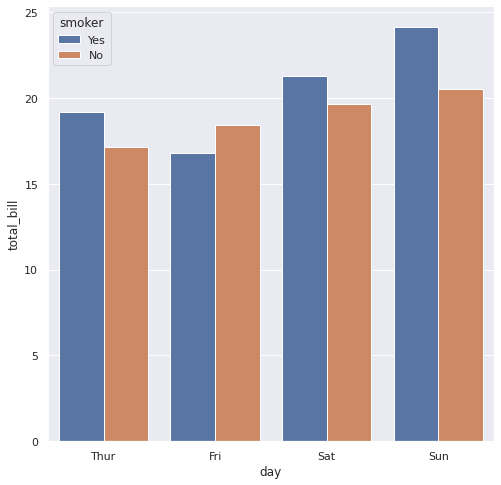

In [ ]:
# Grouped barplot
plt.figure(figsize=(8, 8))
# grouped barplot
sns.barplot(x="day", y="total_bill", hue="smoker", data=tips, ci=None);

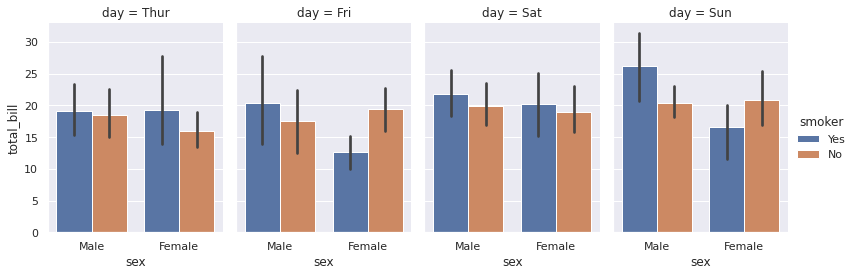

In [ ]:
# More than 2 groups
sns.catplot(x="sex", y="total_bill", hue="smoker", col="day",
            data=tips, kind="bar", height=4, aspect=.7);

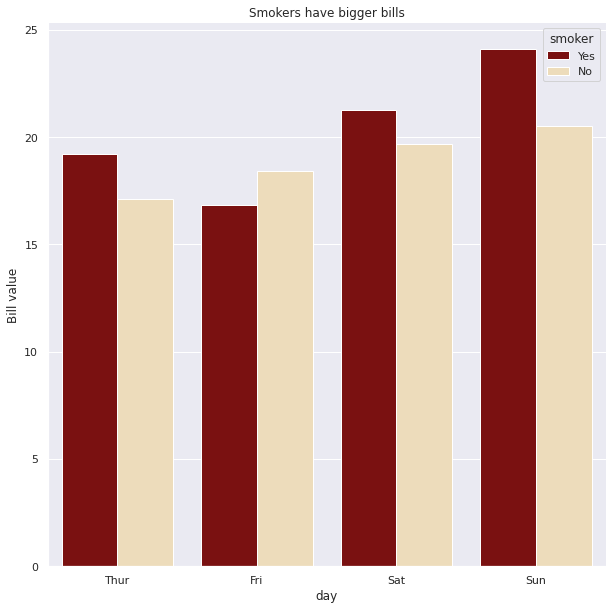

In [ ]:
# Create an array with the colors you want to use
colors = ['darkred', 'wheat']
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(10, 10))
ax = sns.barplot(x="day", y="total_bill", hue="smoker", data=tips, ci=None)
# Customize the axes and title
ax.set_title("Smokers have bigger bills")
ax.set_ylabel("Bill value")
# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Wordcloud

A word cloud (also called tag cloud or weighted list) is a visual representation of text data. Words are usually single words, and the importance of each is shown with font size or color. Python fortunately has a wordcloud library allowing to build them.

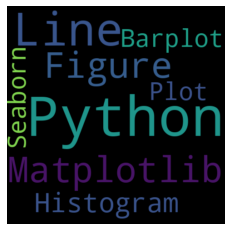

In [ ]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=("Histogram Python Python Line Python Matplotlib Barplot Matplotlib Seaborn Plot Figure Line Figure")

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [ ]:
# Import the library
import plotly.express as px

# Load the iris dataset provided by the library
df = px.data.iris()

# Create the chart:
fig = px.parallel_coordinates(df, color="species_id",
    labels={"species_id": "Species","sepal_width": "Sepal Width",
            "sepal_length": "Sepal Length", "petal_width": "Petal Width",
            "petal_length": "Petal Length", },
    color_continuous_scale=px.colors.diverging.Tealrose,
    color_continuous_midpoint=2)

# Hide the color scale that is useless in this case
fig.update_layout(coloraxis_showscale=False)

# Show the plot
fig.show()